# Getting Python


For this course, we are going to use Jupyter notebook as our environment for developing Python code.
refer to https://jupyter.readthedocs.io/en/latest/content-quickstart.html on the instructions how to install it, the easiest way is to install from Anaconda (https://www.anaconda.com/download/) website, make sure you install with Python 3.6.

Also, it is good for the students who are not familiar with python (or they need a quick refreshment) to follow Jim Bagrow tutorial http://bagrow.com/ds1/whirlwindtourpython/00-Title.html. 

All the assignments to be written in Python 3.7 and can be run using Jupyter on one of the following Internet browsers (Chrome, Safari or Firefox), these are the browsers that officially supported by jupyter.

<u> Note: for this assignment, submit your local copy of this page, running on IPython. Submit the file to Blackboard under Assignment2 using this file format:</u> <b>Yourfirstname_lastname_Assignment2.ipynb. Marks might be deducted if you do not follow the submission steps</b> 

#### <b>Deadline</b>: <u>09/29/2020 11:59 PM.</u>


#### <font color='red'>NOTE: Please refer to the Ipython notebook named linearRegression.ipynb from class lecture. There are overlaps between that notebook and the assignment 2 </font>


# Assignment 2

##### Always import the necessary libraries in the first cell as it is a good coding practice

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# Assignment 2 -- Part 1(Logistic regression without regularization )

In this exercise, you will implement logistic regression and apply it to the dataset named Iris.csv.

In this dataset there are two continuous variables named "PetalLengthCm" and  and "PetalWidthCm". Depending on these two variables, the type of flower is assigned in the "species" column. Setosa is labeled as 0 and versicolor is labeled as 1. Your task will be to classifiy between these two types of flowers.  


### Part 1, Q1 -  [10 pts]

1. [5 points] Load the data and split it into X(features vector) and Y(target/output vector).You can follow the way that has been shown in the class in the LinearRegression.ipynb. 

In [2]:
data = pd.read_csv(os.getcwd() + '/Iris.csv')

X = data.loc[:, ["Id", "PetalLengthCm", "PetalWidthCm"]]
X = data.drop(columns=['Id', 'Species'])
Y = data.loc[:, ["Species"]]

b = pd.DataFrame(np.ones((100,1)))
X = pd.concat([b, X], axis=1)

print (X.shape)
print (Y.shape)

(100, 3)
(100, 1)


2. [5 points] Visualize the data. 
For visualizing,PetalLengthCm will be in the X-axis and PetalWidthCm will be on the Y-axis. Put + (plus) for Setosa, and circle for versicolor.

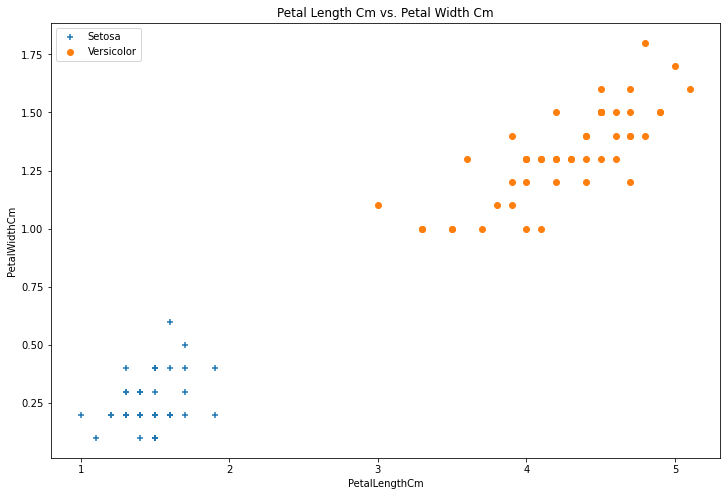

In [3]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(data.PetalLengthCm[data.Species == 0], data.PetalWidthCm[data.Species == 0], marker="+", label="Setosa")
ax.scatter(data.PetalLengthCm[data.Species == 1], data.PetalWidthCm[data.Species == 1], marker="o", label="Versicolor")
ax.set_xlabel('PetalLengthCm')
ax.set_ylabel('PetalWidthCm')
ax.set_title('Petal Length Cm vs. Petal Width Cm')
ax.legend(loc=2)

ax

### Part 1, Q2 -  [5 pts]

Before you start with the implementation of the cost function and gradient descent algorithm for logistic Regression, at first implement the function "sigmoid” that can be called by the rest of your program. Test it when you are finished. Try testing a few values by calling sigmoid(x). For large positive values of x, the sigmoid should be close to 1, while for large negative values, the sigmoid should be close to 0. Evaluating sigmoid(0) should give you exactly 0.5.
The equation for sigma is (in vectorized format)

![](images/H1.png)
Here 

![](images/H2.png)

The dimension of Z should be (100,1)

In [4]:
#Choose the parameters and return the value. This function will return a vector of Z dimension 
def sigmoid(Z):
    return (1 / (1 + (np.exp(-Z))))


#The following lines are for few test case check. The sigmoid function should be fine if you are passing this test cases.
assert sigmoid(0) == 0.5, "The sigmoid function is wrong."
assert 1.1 > sigmoid(100)  > 0.9999, "The sigmoid function is wrong."
assert -0.1 < sigmoid(-100) < 0.0001, "The sigmoid function is wrong."

# visual inspection
#This below line will help you to test your sigmoid function for different values between -1 and 1. 
#You can check your sigmoid function using the following line.
list("x: %6.3f sigx: %6.3f"% (x, sigx) for (sigx, x) in  zip(sigmoid(np.linspace(-1,1,11)), np.linspace(-1,1,11)))

['x: -1.000 sigx:  0.269',
 'x: -0.800 sigx:  0.310',
 'x: -0.600 sigx:  0.354',
 'x: -0.400 sigx:  0.401',
 'x: -0.200 sigx:  0.450',
 'x:  0.000 sigx:  0.500',
 'x:  0.200 sigx:  0.550',
 'x:  0.400 sigx:  0.599',
 'x:  0.600 sigx:  0.646',
 'x:  0.800 sigx:  0.690',
 'x:  1.000 sigx:  0.731']

### Part 1, Q3 -  [10 pts]



1.  [5 points] Implement cost function (calcLogRegressionCost) as detailed in the cell below.

The vectorized equation for the cost function is given below as discussed in the course material.  

![](images/J1.png)

2.  [5 points] Implement gradient descent (logRegressionGradientDescent) as detailed in the cell below. 

The vectorized equation for gradient descent is given below: 

![](images/G1.png)



Hint: Once you are done,  call your "calcLogRegressionCost" using the initial parameters of θ. You should see that the cost is about 0.693.

Note: no need to add the regularization term for now. 

In [5]:
#You may change the number of parameters according to your wish for
#all the funtions depending on your implementation.

#This function will return the cost only.
def calcLogRegressionCost(X, y, theta):
    #X is the feature vector
    #Y is the target vector/ output vector
    #theta is the weight vector 
    
    m, d = X.shape
    h_theta = sigmoid(np.dot(X, theta))
    return float(-1 * (np.sum(np.multiply(y, np.log(h_theta)) + np.multiply((1 - y), np.log(1 - h_theta))))/m)

#This function will return the updated theta and loss over epochs 
def logRegressionGradientDescent(X, y, thetaInit, eta, epochs):
    #X is the feature vector
    #Y is the target vector/ output vector
    #theta is the weight vector 
    #eta is the learning rate
    #epochs is the steps you want to take.
  
    m, d = X.shape
    theta = thetaInit.copy()
    losses = np.zeros(epochs)
    
    for i in range(epochs):
        gradient = (2/m) * (np.dot(X.T, (sigmoid(np.dot(X, theta)) - y)))
        theta -= eta * gradient
        losses[i] = calcLogRegressionCost(X, y, theta)
    
    return theta, losses

In [6]:
#This part is for testing
theta = np.zeros((X.shape[1], 1))
print(calcLogRegressionCost(X, Y, theta)) # this should be about 0.693

0.6931471805599453


### Part 1, Q3 -  [10 pts]

As you have the gradient decent algorithm implemented,

1. [5 Points] Run the gradient descent algorithm to fit your parameters theta to the training set.


In [7]:
eta =  0.05
epochs = 5000
theta, cost = logRegressionGradientDescent(X, Y, theta, eta, epochs)
print(calcLogRegressionCost(X, Y, theta))

0.01248861689182234


2. [2 Points] Report optimal final θ.

In [8]:
optimal_theta = theta.copy()
print(optimal_theta)

[[-8.6853308 ]
 [ 2.38484516]
 [ 3.62510853]]



3. [3 Points] Plot the cost vs the number of epochs. what is the best learning rate you choosed and why ?

Text(0.5, 1.0, 'Error vs. Training Epoch')

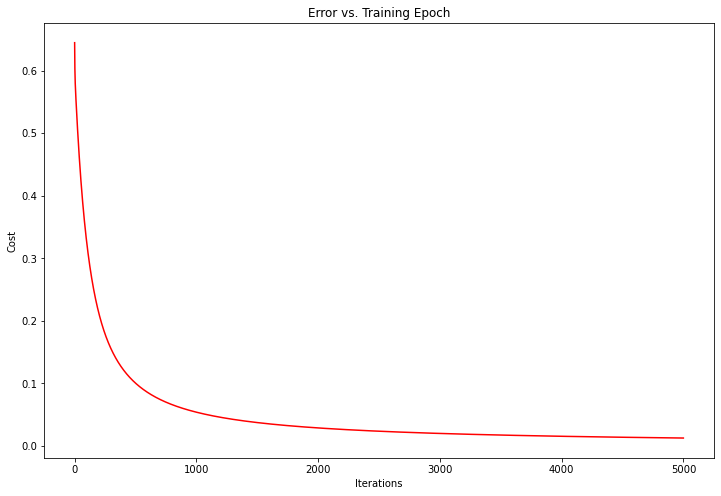

In [9]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(epochs), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

### Part 1, Q4 -  [15 pts]
At this point, you have the optimal theta.

1. [4 Points] Implement the predict_proba function.


In [10]:
def predict_proba(X,theta):
    #you need to know the probability of a certain test sample falling in a certain class.
    #For this you need a function which will give you the probability.
    #This function should return a probability
    
    z = np.dot(X, theta)
    return sigmoid(z)

2. [3 Points] Suppose,the petal length is 2.0 and petal width is 0.3. Using the predict_proba function find  the probability of this sample being a Setosa.

In [11]:
testing_sample = np.array([2.0, 0.3])
# looking for .3 or .4
print(predict_proba(testing_sample, theta))

ValueError: shapes (2,) and (3,1) not aligned: 2 (dim 0) != 3 (dim 0)

3. [8 Points] Plot the decision boundary with respect to the data. The plot shoud include the PetalLengthCm in the X-axis andPetalWidthCm in the Y-axis. Put + (plus) for Setosa, and circle for versicolor. The decision boundary should spearate between the classes using the optimal theta that you find in Part 1, Q3.

In [ ]:
x = np.linspace(data.PetalLengthCm.min(), data.PetalWidthCm.max(), 100)

f = theta[0, 0] + (theta[1, 0] * x)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.PetalLengthCm[data.Species == 0], data.PetalWidthCm[data.Species == 0], marker="+", label="Setosa")
ax.scatter(data.PetalLengthCm[data.Species == 1], data.PetalWidthCm[data.Species == 1], marker="o", label="Versicolor")
ax.set_xlabel('PetalLengthCm')
ax.set_ylabel('PetalWidthCm')
ax.set_title('Petal Length Cm vs. Petal Width Cm')
ax.legend(loc=2)

ax

# Assignment 2 -- Part 2 (Enhanced Logistic regression )

Import and examine the dataset ex2data2.txt. There are two continuous independent variables in the data - “Test 1” and “Test 2”. Our prediction target is 0(did not passed the test) or 1(passsed the test) label, which is binary-valued.

In this part of the Assignment, you will build a logistic regression model to predict whether a a sample is passed the test or not (a model that estimates the probability of being passed or not based on test 1 and test 2)

### Part 2, Q1 -  [15 pts]

1. [5 Points]  Load the data and visualize it.(You can follow the steps from part1, Q1)

For visualizing,test 1 will be in the X-axis, test 2 will be on the Y-axis. Put + (plus) for passed, and circle for not passed.

In [ ]:
datafile1 = 'ex2data2.txt'
cols = np.loadtxt(datafile1,delimiter=',',usecols=(0,1,2),unpack=True) #Read in comma separated data
#Start you code from here




Before going further, you will be implementing Ridge regularized gradient descent with its corresponding regularized cost function which will be needed at the end of the assignment.
    

2. [5 Points] Implement Ridge Regularized Logistic Regression cost function named calcLogRegressionCostR following the given equation.
The equation is ![](images/G2.png)

In [ ]:
#This function will return the ridge regularized cost only.
def calcLogRegressionCostR(X, y, theta, alpha=0):
    #X is the feature vector
    #Y is the target vector/ output vector
    #theta is the weight vector
    #alpha is the regularization parameter
    
    m = X.shape[0]
    h_theta = sigmoid(np.dot(X, theta))
    cost = (-1/m) * 
    
    return cost

3. [5 Points] Implement logRegressionGradientDescentR . This should be ridge regularized. The equation is 
![](images/G3.png)

In [ ]:
#This function will return the updated theta and loss over epochs by adding ridge regularization
def logRegressionGradientDescentR(X, y, thetaInit, eta, alpha, epochs):
    #X is the feature vector
    #Y is the target vector/ output vector
    #theta is the weight vector 
    #eta is the learning rate
    #alpha is the regulirzation rate
    #epochs is the steps you want to take.
    
    #Start you code from here
    

    return  

    
#This part is given for the testing purpose    
eta = # put a number here, you can use the one from part 1
alpha = # put a number here, you can try different options, think of small values
epochs = # put a number here, you can use the one from part 1
initial_theta = np.zeros((X.shape[1],1))  

theta, mincost = logRegressionGradientDescentR(X,Y,initial_theta,eta, alpha, epochs)
print(calcLogRegressionCostR(X,Y,initial_theta,alpha))
print(theta)

### Part 2, Q2 -  [20 pts]
As you may have noticed in Part 2, Q1 plotting, the data are not linearly separable. When data are not linearly separable, one way to fit the data better is to create more features from each data point.Mapping data to polynomial terms is one of the simplest way.  

1. [5 Points] Map the features into all polynomial terms of x1 and x2 up to the six power. You may use PolynomialFeatures from scikit learn.

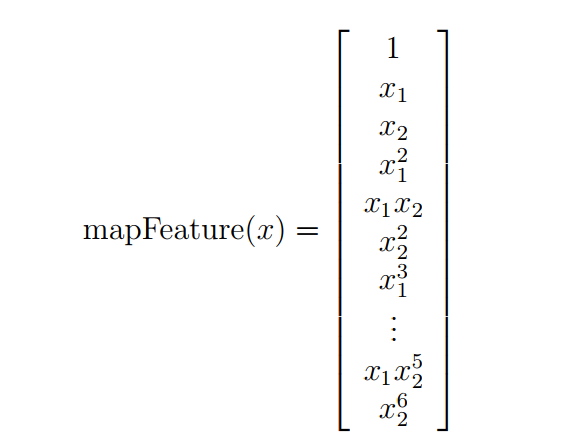


In [ ]:
#Start you code from here

2. [2 Points] Report optimal final θ on the polynominal features using logRegressionGradientDescent (NOT the regularized one).

Note: There should be 28 features as your are taking power of 6.

In [ ]:
#Start you code from here


3. [3 Points] Plot the cost with the number of epochs.

In [ ]:
#Start you code from here

4. [5 Points] Now, try to plot the decision boundary of the polynominal features.Use  logRegressionGradientDescentR for plotting the decision boundary.

In [ ]:
#Start you code from here

  5. [5 Points] What is you comment about the decision boundary in the immediate previous question ? Is it decision boundary behaving as expected ?

### Part 2, Q3 -  [15 pts]

 Regularization is an important way to fit the data more accurately. In the next part try different fours regularization value and plot the decision boundary for every of them. The values might be a mixture of small, large and medium values.

What is your comment about decision boundary for different regularization values ?How regularization is effecting ? Are they reducing overfitting ?

Note: Use regularized version of logRegressionGradientDescentR and calcLogRegressionCostR for decision boundary plotting.

In [ ]:
#Start you code from here
    